<a href="https://colab.research.google.com/github/pramod-mamidi/DAs/blob/master/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-05-11 11:43:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.01s   

2020-05-11 11:43:57 (2.61 MB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [13]:
data=pd.read_csv('Cust_Segmentation.csv')
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


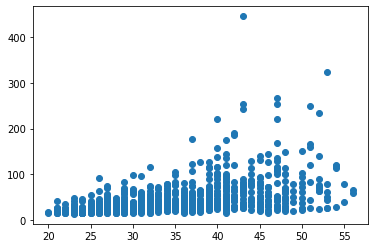

In [5]:
plt.scatter(data['Age'],data['Income'])

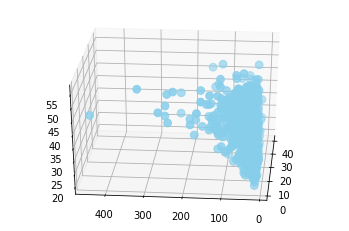

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['DebtIncomeRatio'], data['Income'], data['Age'], c='skyblue', s=60)
ax.view_init(30, 185)
plt.show()

In [14]:
data.drop(columns=['Address'],inplace=True)
print(data)

     Customer Id  Age  Edu  ...  Other Debt  Defaulted  DebtIncomeRatio
0              1   41    2  ...       1.073        0.0              6.3
1              2   47    1  ...       8.218        0.0             12.8
2              3   33    2  ...       5.802        1.0             20.9
3              4   29    2  ...       0.516        0.0              6.3
4              5   47    1  ...       8.908        0.0              7.2
..           ...  ...  ...  ...         ...        ...              ...
845          846   27    1  ...       1.220        NaN              6.8
846          847   28    2  ...       2.021        0.0              7.0
847          848   25    4  ...       3.210        1.0             33.4
848          849   32    1  ...       0.696        0.0              2.9
849          850   52    1  ...       3.638        0.0              8.6

[850 rows x 9 columns]


In [15]:
x=data[np.array(data.columns)].values
x[0:5]

array([[1.000e+00, 4.100e+01, 2.000e+00, 6.000e+00, 1.900e+01, 1.240e-01,
        1.073e+00, 0.000e+00, 6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, 2.600e+01, 1.000e+02, 4.582e+00,
        8.218e+00, 0.000e+00, 1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, 1.000e+01, 5.700e+01, 6.111e+00,
        5.802e+00, 1.000e+00, 2.090e+01],
       [4.000e+00, 2.900e+01, 2.000e+00, 4.000e+00, 1.900e+01, 6.810e-01,
        5.160e-01, 0.000e+00, 6.300e+00],
       [5.000e+00, 4.700e+01, 1.000e+00, 3.100e+01, 2.530e+02, 9.308e+00,
        8.908e+00, 0.000e+00, 7.200e+00]])

In [16]:
x=preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-1.7300143 ,  0.74291541,  0.31212243, -0.37878978, -0.71845859,
        -0.68381116, -0.59048916, -0.59494973, -0.57652509],
       [-1.72593888,  1.48949049, -0.76634938,  2.5737211 ,  1.38432469,
         1.41447366,  1.51296181, -0.59494973,  0.39138677],
       [-1.72186347, -0.25251804,  0.31212243,  0.2117124 ,  0.26803233,
         2.13414111,  0.80170393,  1.68081427,  1.59755385],
       [-1.71778805, -0.75023477,  0.31212243, -0.67404087, -0.71845859,
        -0.42164323, -0.75446707, -0.59494973, -0.57652509],
       [-1.71371263,  1.48949049, -0.76634938,  3.31184882,  5.35624866,
         3.63890032,  1.71609424, -0.59494973, -0.44250653]])

array([-1.48548931,  0.49405704, -0.76634938,  1.24509121,  0.34591319,
        0.41098707,  0.7922833 , -0.59494973,  0.52540533])

In [28]:
clstr = KMeans(init = "k-means++", n_clusters = 4, n_init = 12,max_iter=400)
x=np.nan_to_num(x)
clstr.fit(x)
lb=clstr.labels_
cc=clstr.cluster_centers_
print(lb)
print(cc)

[1 2 0 1 3 2 1 1 1 2 2 1 1 2 0 1 1 1 2 2 1 2 0 2 3 2 1 2 2 1 2 2 0 1 1 1 0
 0 1 2 0 2 0 2 2 2 1 1 1 1 2 2 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 0 1 0 1 1 2 0
 1 1 1 1 3 2 2 0 2 1 2 1 0 1 0 0 2 1 0 0 1 1 1 1 0 1 0 3 2 0 0 2 1 1 1 2 2
 0 1 0 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 0 0 1 1 1 3 0 2 0
 1 1 1 2 0 1 1 2 2 2 0 0 1 2 2 1 1 1 1 1 1 2 2 1 1 0 1 0 2 1 0 2 0 1 1 3 0
 0 1 1 2 2 0 2 2 0 2 1 1 2 3 1 2 1 0 1 1 2 1 2 2 0 1 1 1 2 1 0 0 0 2 2 0 2
 1 1 1 1 3 1 0 2 1 2 2 1 2 1 2 0 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 0 2 0 2 0 1
 1 1 0 2 0 2 0 1 2 1 1 0 1 1 2 1 0 0 0 1 1 1 3 2 1 2 1 2 1 2 2 1 1 1 0 1 1
 0 1 0 2 2 2 1 1 0 1 2 0 0 1 1 1 1 1 2 1 1 0 1 0 3 1 0 1 1 1 0 0 2 2 2 2 0
 1 1 0 1 2 0 2 2 2 1 0 2 1 1 1 1 1 3 1 1 1 1 1 3 1 1 1 2 0 1 0 2 1 2 2 2 2
 0 1 2 0 0 1 0 2 0 1 1 1 1 1 3 1 2 1 1 1 1 0 1 0 1 1 1 2 1 1 1 1 0 1 1 0 0
 2 2 1 1 2 1 0 0 2 2 0 2 1 2 0 1 1 3 2 1 2 1 1 2 2 0 1 2 1 1 1 2 2 1 2 1 3
 2 0 1 1 2 1 3 0 1 1 3 1 0 1 1 2 1 3 1 1 1 1 2 1 1 2 2 1 2 2 2 0 2 1 1 0 1
 0 1 1 1 1 2 2 0 0 1 2 1 

In [29]:
data["labels"]=lb
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,labels
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


In [33]:
data.groupby('labels').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
labels,,,,,,,,,
0,416.397727,30.687500,1.948864,3.590909,31.329545,1.695466,3.002551,0.950920,14.787500
1,445.325980,32.186275,1.580882,5.872549,30.580882,0.687657,1.528703,0.003030,7.546324
2,390.328947,42.017544,1.675439,15.697368,71.675439,1.958789,4.213158,0.056497,9.789912
3,465.815789,43.736842,2.210526,17.736842,140.552632,8.282289,13.268342,0.566667,19.271053


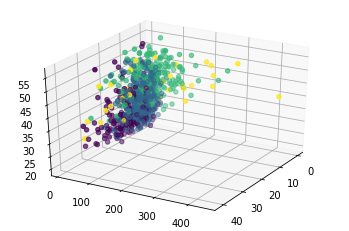

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['DebtIncomeRatio'], data['Income'], data['Age'],c=lb.astype(np.float))
ax.view_init(30, 30)
plt.show()

In [0]:
w=[]
for i in range(1,20):
  clstr = KMeans(init = "k-means++", n_clusters = i, n_init = 12,max_iter=400)
  clstr.fit(x)
  w.append(clstr.inertia_)

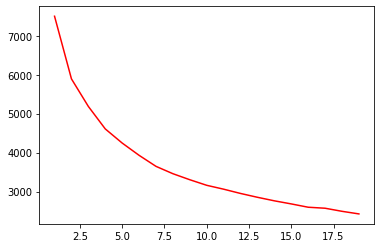

In [57]:
plt.plot(np.arange(1,20),w,c='r')
plt.show()
#therefore elbow point is 2 hence this dataset would have good output with k = 2.